In [1]:
from chart_agent import chart_node
from search_agent import search_node
from langgraph.graph import StateGraph,START,END
from state import AgentState
from langchain_core.messages import HumanMessage

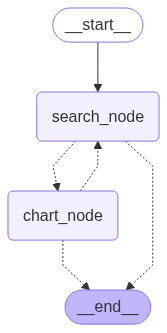

In [2]:
graph= StateGraph(AgentState)
graph.add_node("search_node",search_node)
graph.add_node("chart_node",chart_node)


graph.add_edge(START,"search_node")
compiledgraph=graph.compile()
compiledgraph

in search node state : messages=[HumanMessage(content="First, get the UK's GDP over the past 5 years, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={})] sender='user'
{'messages': [HumanMessage(content="First, get the UK's GDP over the past 5 years, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='aac9204d-6027-4463-801e-a6a3bb303e9f'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_TJ95XiqQiUUrB2hlrYvWnA3o', 'function': {'arguments': '{"query":"UK GDP past 5 years"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 132, 'total_tokens': 156, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens'

Python REPL can execute arbitrary code. Use with caution.


in code tool


InvalidUpdateError: Expected dict, got __end__
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

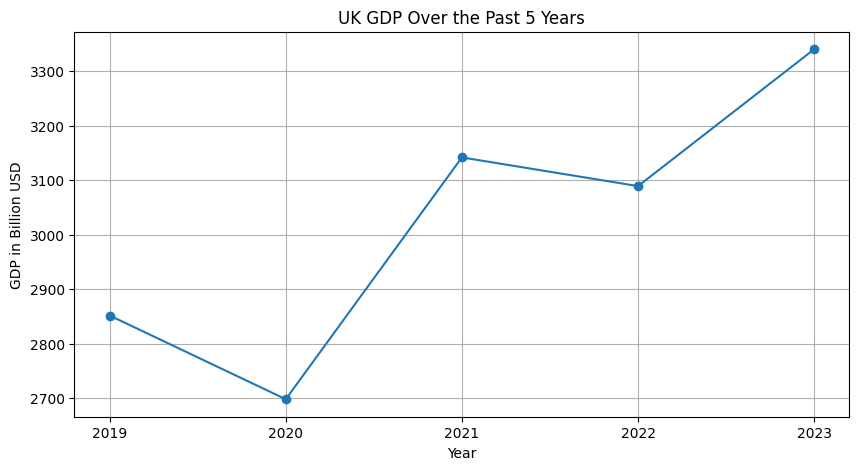

In [3]:
events = compiledgraph.invoke(
    {
        "messages": [
            HumanMessage(content="First, get the UK's GDP over the past 5 years, then make a line chart of it. Once you make the chart, finish.")
        ],
        "sender":"user"
    },
    # Maximum number of steps to take in the graph
    {"recursion_limit": 5}
)
for s in events:
    print(s)
    print("----")